In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data=pd.read_csv("/content/pima-indians-diabetes.data (2).csv")

In [15]:
data.columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

In [34]:
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

In [35]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

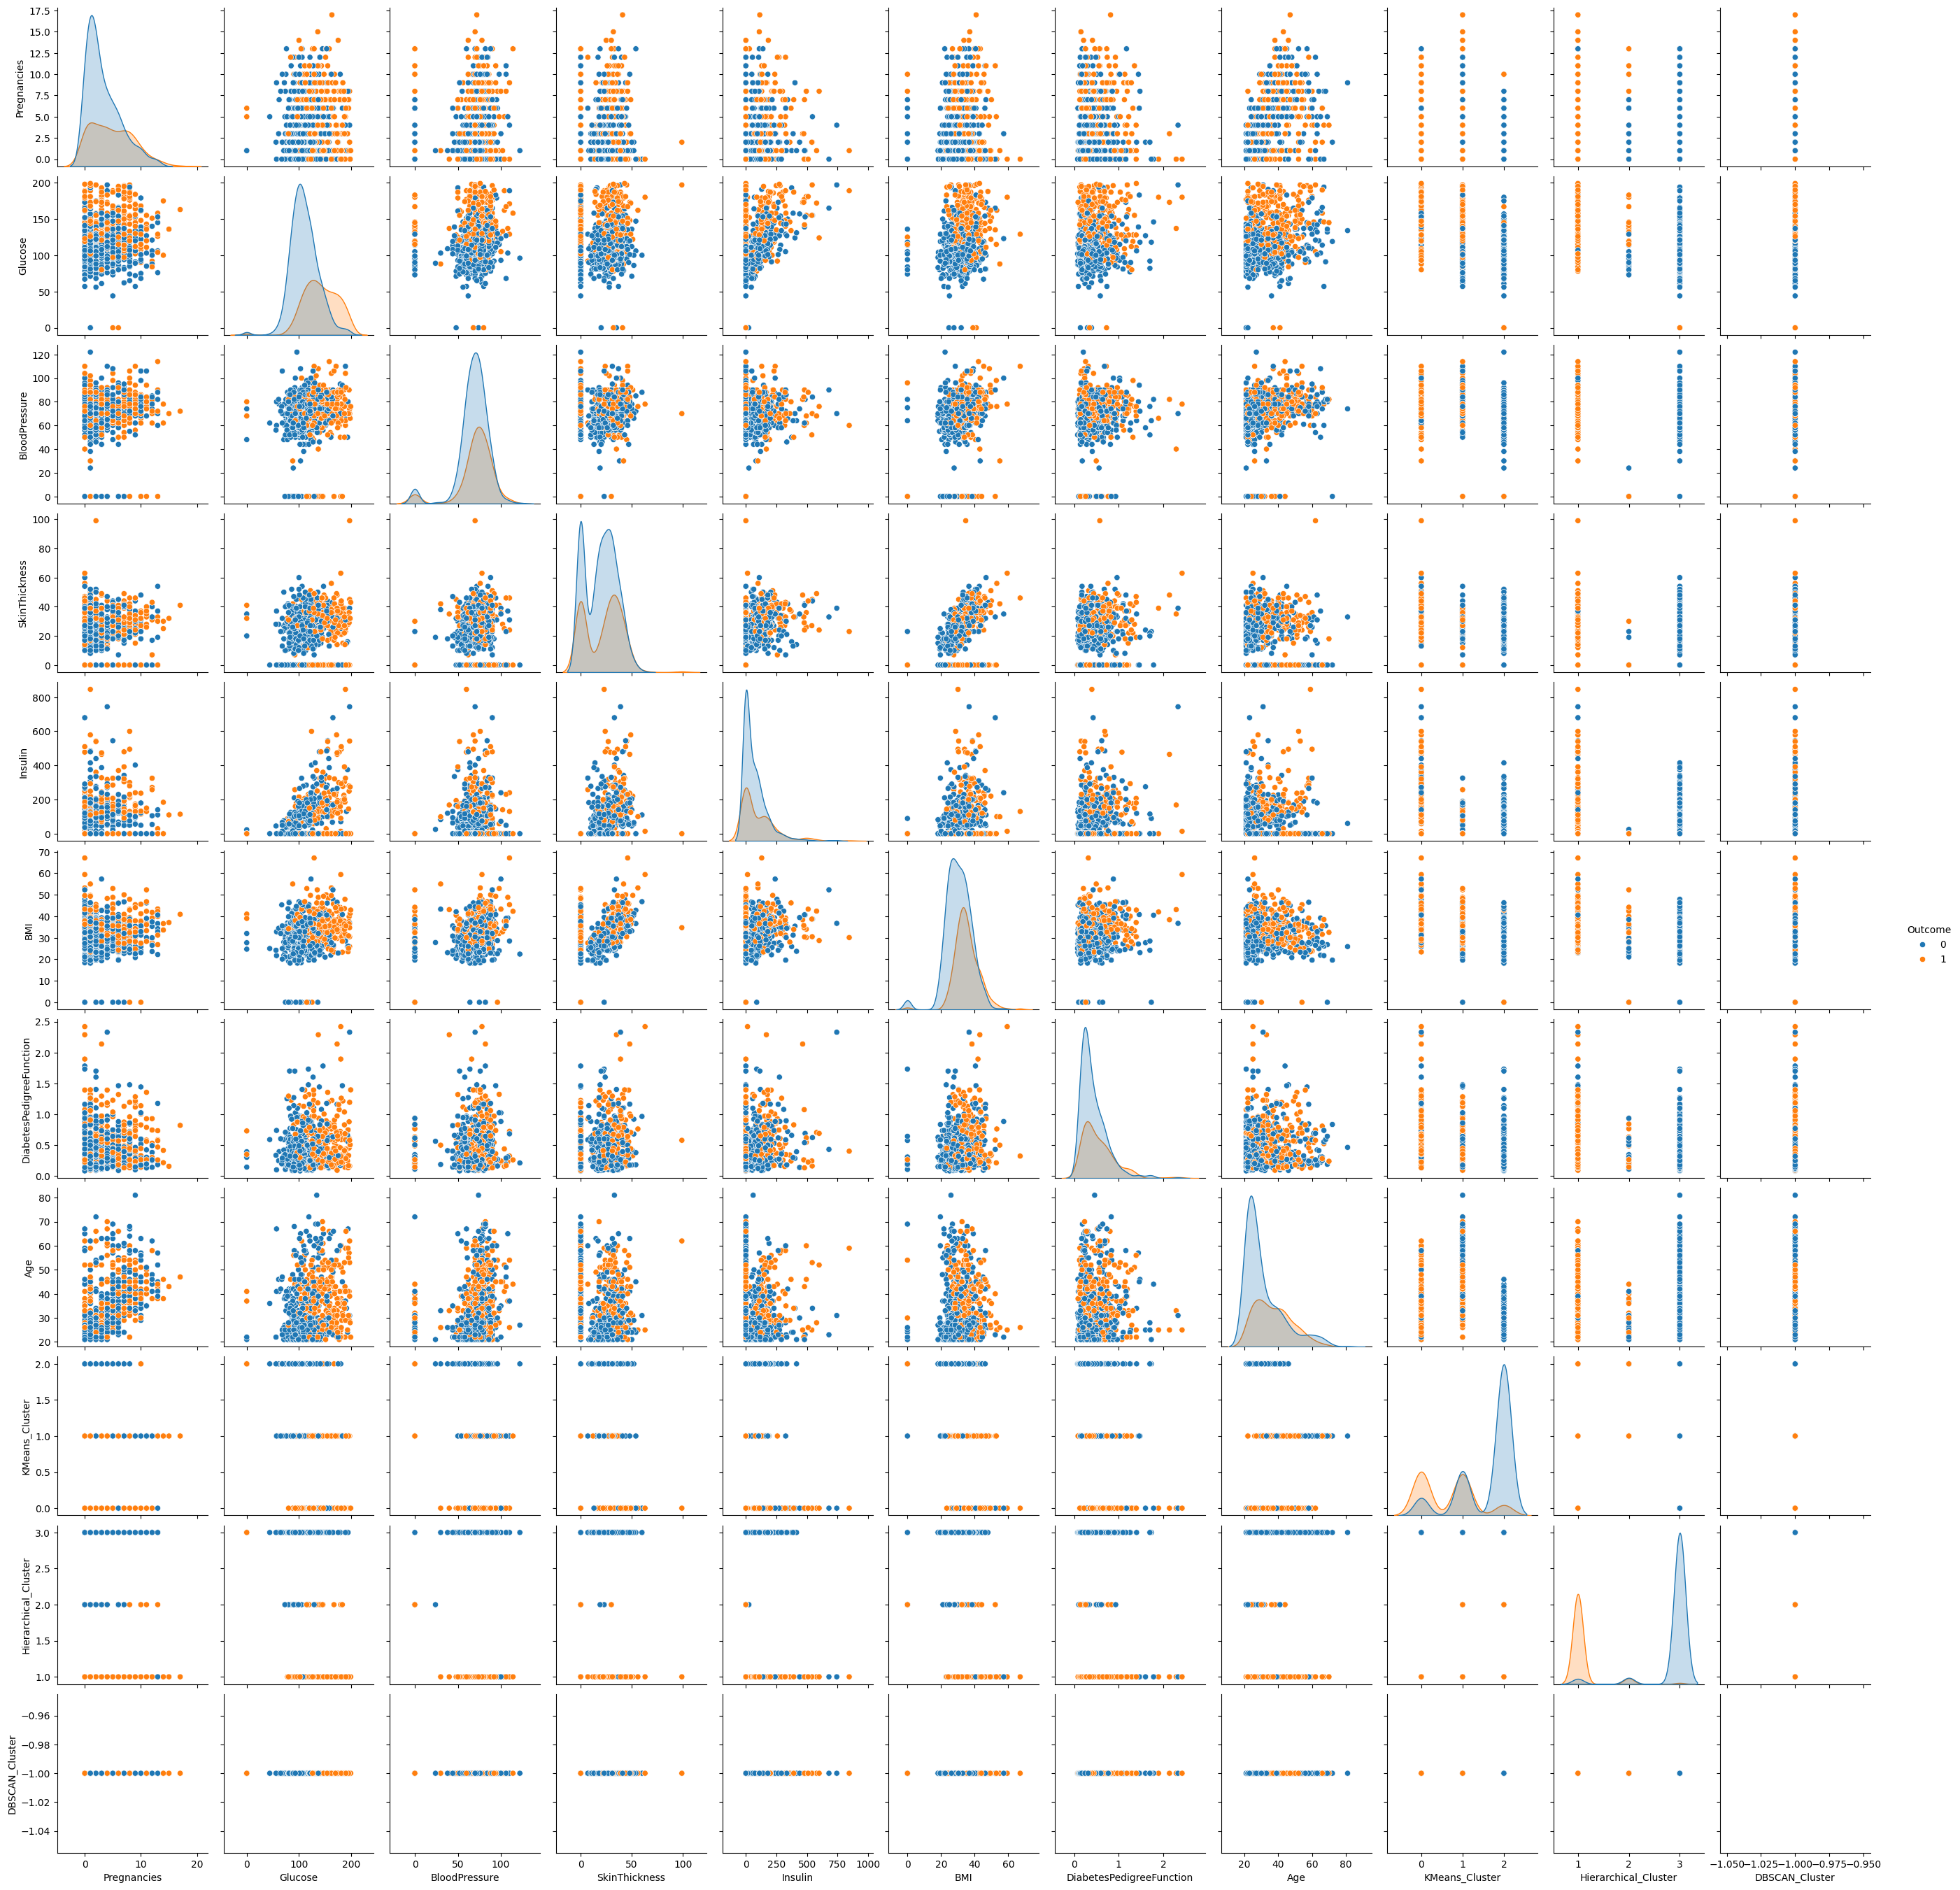

In [36]:
sns.pairplot(data, hue="Outcome")
plt.show()

In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

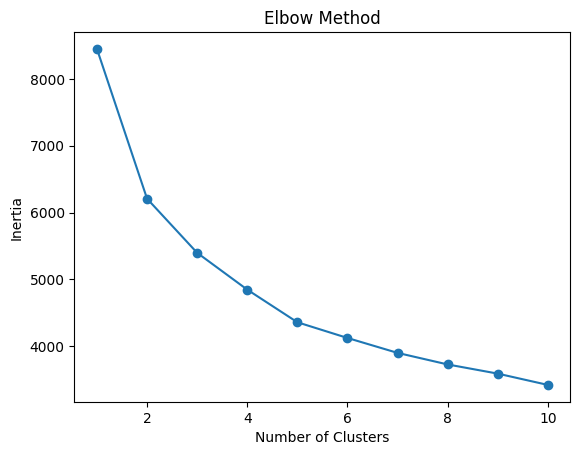

In [37]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

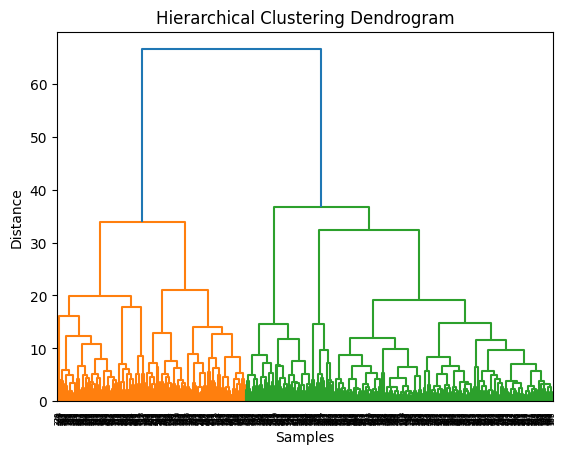

In [39]:
linkage_matrix = linkage(data_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [40]:
hierarchical_labels = fcluster(linkage_matrix, 3, criterion='maxclust')


In [41]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

In [42]:
data['KMeans_Cluster'] = kmeans_labels
data['Hierarchical_Cluster'] = hierarchical_labels
data['DBSCAN_Cluster'] = dbscan_labels

Text(0.5, 1.0, 'K-Means Clustering')

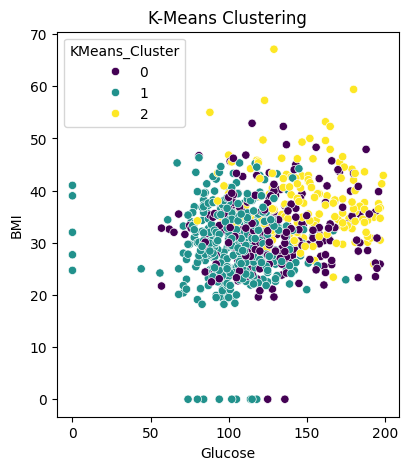

In [43]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x="Glucose", y="BMI", hue="KMeans_Cluster", palette="viridis")
plt.title('K-Means Clustering')

Text(0.5, 1.0, 'Hierarchical Clustering')

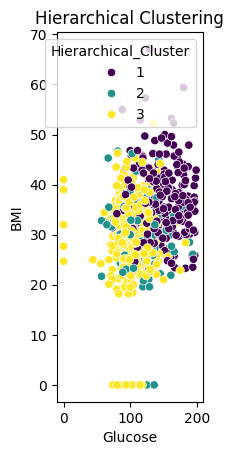

In [46]:
plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x="Glucose", y="BMI", hue="Hierarchical_Cluster", palette="viridis")
plt.title('Hierarchical Clustering')

Text(0.5, 1.0, 'Hierarchical Clustering')

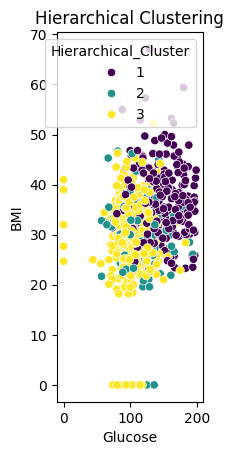

In [47]:
plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x="Glucose", y="BMI", hue="Hierarchical_Cluster", palette="viridis")
plt.title('Hierarchical Clustering')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

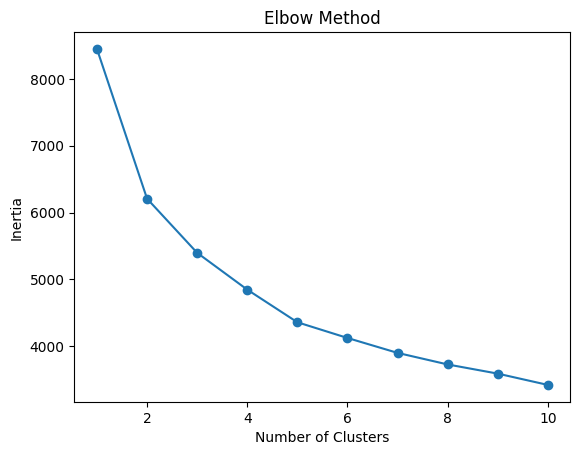

In [48]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [50]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

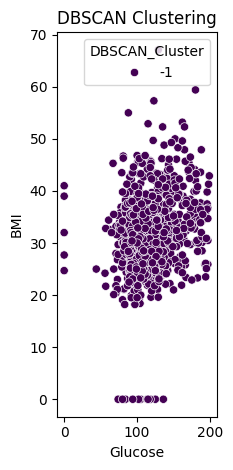

In [51]:
plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x="Glucose", y="BMI", hue="DBSCAN_Cluster", palette="viridis")
plt.title('DBSCAN Clustering')
plt.tight_layout()
plt.show()

In [52]:
print(f'Silhouette Score for K-Means: {silhouette_score(data_scaled, kmeans_labels):.2f}')
if len(set(dbscan_labels)) > 1:
    print(f'Silhouette Score for DBSCAN: {silhouette_score(data_scaled, dbscan_labels):.2f}')
else:
    print('DBSCAN did not find more than one cluster.')

Silhouette Score for K-Means: 0.25
DBSCAN did not find more than one cluster.
